In [1]:
from rightmove_webscraper import RightmoveData
import geopandas
import pandas as pd
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib as mpl
import descartes
from shapely.geometry import Point, Polygon
import json
from bokeh.io import curdoc, output_notebook, show, output_file
from bokeh.models import Slider, HoverTool, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.layouts import widgetbox, row, column
from bokeh.plotting import figure, save
from bokeh.palettes import brewer
from colour import Color

%matplotlib inline

In [2]:
def get_property(address):
    return address.split('.')[-2].split('/')[-1][9:]

In [3]:
url = "https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E5814&maxBedrooms=5&minBedrooms=5&maxPrice=2500&radius=0.25&propertyTypes=detached%2Csemi-detached%2Cterraced&primaryDisplayPropertyType=houses&includeLetAgreed=false&mustHave=&dontShow=&furnishTypes=&keywords="
rm = RightmoveData(url)

In [4]:
results = rm.get_results

In [5]:
properties_to_check = [
"https://www.rightmove.co.uk/property-to-rent/property-57044002.html",
"https://www.rightmove.co.uk/property-to-rent/property-77593630.html",
"https://www.rightmove.co.uk/property-to-rent/property-90039992.html",
"https://www.rightmove.co.uk/property-to-rent/property-86392985.html",
"https://www.rightmove.co.uk/property-to-rent/property-85817531.html",
"https://www.rightmove.co.uk/property-to-rent/property-78857801.html",
"https://www.rightmove.co.uk/property-to-rent/property-89614100.html",
"https://www.rightmove.co.uk/property-to-rent/property-86585597.html",
"https://www.rightmove.co.uk/property-to-rent/property-77537065.html",
"https://www.rightmove.co.uk/property-to-rent/property-86905715.html",
"https://www.rightmove.co.uk/property-to-rent/property-87416795.html",
"https://www.rightmove.co.uk/property-to-rent/property-90039992.html",
"https://www.rightmove.co.uk/property-to-rent/property-88383944.html",
"https://www.rightmove.co.uk/property-to-rent/property-88384940.html"
]
check_series = pd.Series(properties_to_check)
check_properties = check_series.apply(get_property)

In [6]:
results

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
0,1650,5 bedroom terraced house,"Gelligaer Street, Cathays, Cardiff, CF24",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,CF24,5,2020-04-11 18:05:57.245066
1,1200,5 bedroom end of terrace house,"Robert Street, Cardiff, Cardiff (County of), CF24",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,CF24,5,2020-04-11 18:05:57.245066
2,1700,5 bedroom terraced house,"Daniel Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066
3,1600,5 bedroom house,"Tewkesbury Street, Cathays, ( 5 Beds )",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066
4,1600,5 bedroom terraced house,"Monthermer Road, Cardiff, CF24",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,CF24,5,2020-04-11 18:05:57.245066
...,...,...,...,...,...,...,...,...
78,1850,5 bedroom terraced house,Manor Street,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066
79,1975,5 bedroom house,"Cathays Terrace, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066
80,1700,5 bedroom terraced house,Summerfield Avenue,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066
81,1400,5 bedroom house,"Talworth Street, ROATH, CARDIFF",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066


In [7]:
results['property'] = results['url'].apply(lambda x: get_property(x))

In [8]:
print("The following properties are not able to be found for whatever reason:")
list(check_properties[check_properties.isin(results['property']) == False])

The following properties are not able to be found for whatever reason:


['87416795']

In [9]:
results_to_check = results[results['property'].isin(check_properties)]
results_to_check.head()

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date,property
1,1200,5 bedroom end of terrace house,"Robert Street, Cardiff, Cardiff (County of), CF24",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,CF24,5,2020-04-11 18:05:57.245066,78857801
14,1200,5 bedroom property,"Llantrisant Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,89614100
15,1875,5 bedroom house,"Llantrisant Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,86585597
19,1450,5 bedroom house,"Woodville Road, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,86392985
20,350,5 bedroom house,Letty Street,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,90039992


## Geocode with Open Street Map

Encountered issues with the following addresses so manuanally correcting:

In [10]:
results_to_check.loc[26, 'address'] = 'Woodville Road, Cathays'
results_to_check.loc[55, 'address'] = 'Fitzroy Street, Cathays'
results_to_check.loc[82, 'address'] = 'Salisbury Road, Cathays'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
geolocator = Nominatim(user_agent="rightmove")
def do_geocode(address, attempt=1, max_attempts=5):
    try:
        location = geolocator.geocode(address)
        return (location.longitude, location.latitude)
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(address, attempt=attempt+1)
        raise

In [12]:
results_to_check['geocode'] = results_to_check['address'].apply(lambda x: do_geocode(x, max_attempts=10))

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
results_to_check.head()

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date,property,geocode
1,1200,5 bedroom end of terrace house,"Robert Street, Cardiff, Cardiff (County of), CF24",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,CF24,5,2020-04-11 18:05:57.245066,78857801,"(-3.1752672, 51.4955415)"
14,1200,5 bedroom property,"Llantrisant Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,89614100,"(-3.1831102, 51.4950838)"
15,1875,5 bedroom house,"Llantrisant Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,86585597,"(-3.1831102, 51.4950838)"
19,1450,5 bedroom house,"Woodville Road, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,86392985,"(-3.180188, 51.4906435)"
20,350,5 bedroom house,Letty Street,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,5,2020-04-11 18:05:57.245066,90039992,"(-3.1800107, 51.4928378)"


## Add final touches to the dataframe

In [14]:
def regularise_price(row):
    if row['price'] > 600:
        row['price'] = row['price']/row['number_bedrooms']
    return row
    
results_to_check = results_to_check.apply(regularise_price, axis=1)

In [15]:
lower_bound = 200
upper_bound = 400
colours = list(Color('#676DC6').range_to(Color('#292B57'), upper_bound - lower_bound))
colours_hex = [x.get_hex() for x in colours]

In [16]:
def colour_decider(row):
    row['colour'] = colours_hex[int(row['price'] - (lower_bound + 1))]
    return row 

In [17]:
results_to_check = results_to_check.apply(colour_decider, axis=1)

In [18]:
results_to_check = results_to_check.drop(['postcode', 'search_date'], axis=1)

In [19]:
results_to_check.head()

,price,type,address,url,agent_url,number_bedrooms,property,geocode,colour
1,240.0,5 bedroom end of terrace house,"Robert Street, Cardiff, Cardiff (County of), CF24",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,5,78857801,"(-3.1752672, 51.4955415)",#5157ba
14,240.0,5 bedroom property,"Llantrisant Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,5,89614100,"(-3.1831102, 51.4950838)",#5157ba
15,375.0,5 bedroom house,"Llantrisant Street, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,5,86585597,"(-3.1831102, 51.4950838)",#2f3267
19,290.0,5 bedroom house,"Woodville Road, Cathays, Cardiff",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,5,86392985,"(-3.180188, 51.4906435)",#42479e
20,350.0,5 bedroom house,Letty Street,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,5,90039992,"(-3.1800107, 51.4928378)",#353877


# Let's map it

In [20]:
crs = 'EPSG:4326'
points = [Point(xy) for xy in results_to_check['geocode']]

In [21]:
geo_df = geopandas.GeoDataFrame(results_to_check,
                               crs=crs,
                               geometry = points)

In [22]:
loc = "Cardiff/roads-line.shp"
loc2 = "Cardiff/railways-line.shp"
map_cardiff = geopandas.read_file(loc)
map_cardiff_railways = geopandas.read_file(loc2)

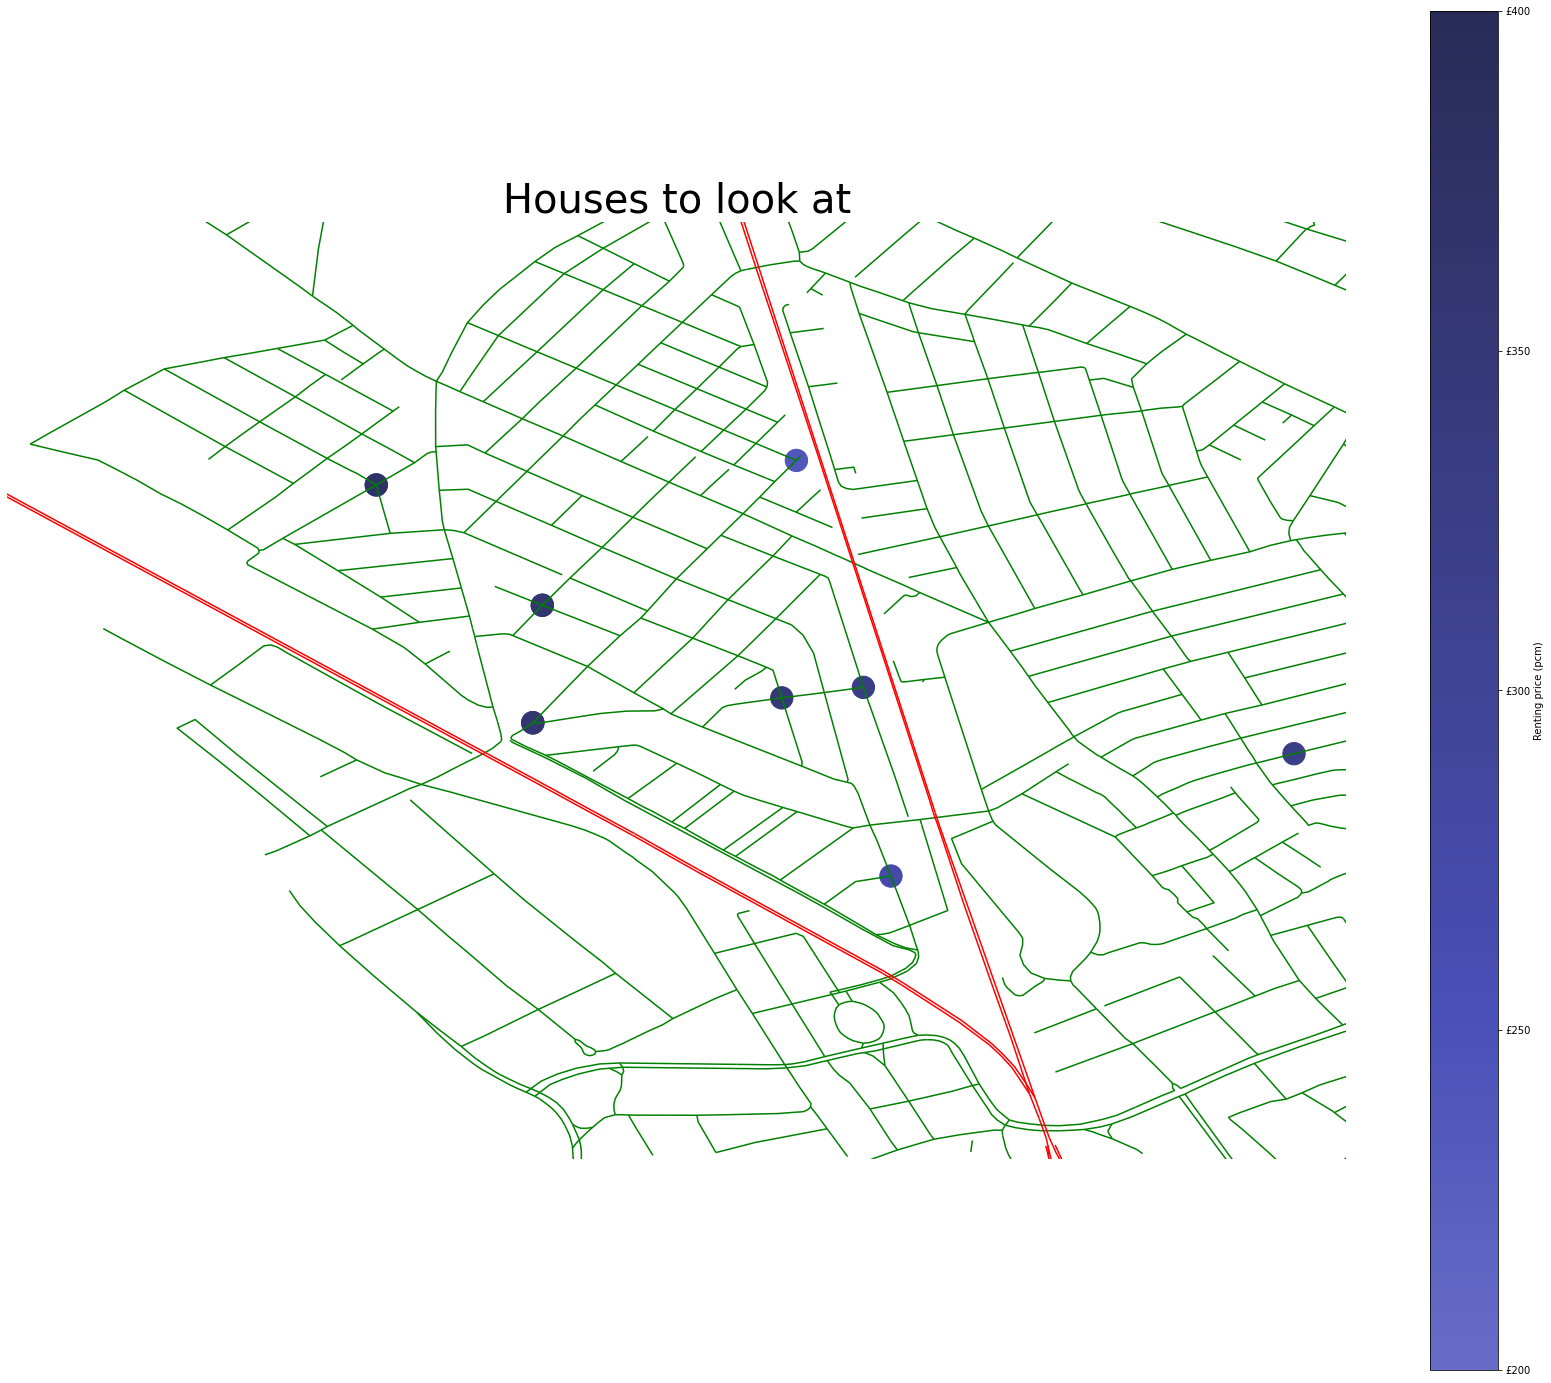

In [23]:
fig,ax = plt.subplots(figsize=(30,25))
map_cardiff[map_cardiff['name'].isna() == False].plot(ax=ax, color='green')
map_cardiff_railways.plot(ax=ax, color='red')
geo_df.plot(ax=ax, color=geo_df['colour'], markersize=500)
ax.set_xlim(-3.19, -3.165)
ax.set_ylim(51.4825, 51.50)
ax.axis('off')
ax.set_title('Houses to look at', fontsize=40)
cmap = mpl.colors.ListedColormap(colours_hex)
norm = mpl.colors.Normalize(vmin=lower_bound, vmax=upper_bound)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm)
cbar.set_label('Renting price (pcm)')
cbar.set_ticks([200,250,300,350,400])
cbar.set_ticklabels(['£' + str(x) for x in cbar.get_ticks()])
fig.savefig("plot.pdf")
plt.show()

## How about we use Bokeh instead to get an interactive one

In [24]:
roads_json = json.loads(map_cardiff[map_cardiff['name'].isna() == False].to_json())
railway_json = json.loads(map_cardiff_railways.to_json())
houses_json = json.loads(geo_df.to_json())
json_data_roads = json.dumps(roads_json)
json_data_railway = json.dumps(railway_json)
json_data_houses = json.dumps(houses_json)

In [25]:
roads = GeoJSONDataSource(geojson = json_data_roads)
railways = GeoJSONDataSource(geojson = json_data_railway)
houses = GeoJSONDataSource(geojson = json_data_houses)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 200, high = 400, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'200': '£200', '250': '£250', '300':'£300', '350': '£350', '400': '£400'}



#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Houses looked at', plot_height = 600 , plot_width = 950, 
           toolbar_location = None, tools = ["wheel_zoom,pan,box_zoom,reset,save"], x_range=(-3.19, -3.165), y_range=(51.4825, 51.50),
          active_scroll = "wheel_zoom")
p.grid.grid_line_color = None
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add line renderer to figure. 
road_renders = p.multi_line('xs','ys',source=roads, line_color='green')
railway_renders = p.multi_line('xs','ys',source=railways, line_color='red')
house_renders = p.circle('x', 'y', source=houses, size=20 , color = {'field' :'price', 'transform' : color_mapper})

#Add hover tool
road_hover = HoverTool(tooltips = [ ('Street','@name')], renderers=[road_renders])
house_hover = HoverTool(tooltips = [('Address', '@address'), ('Price', '£@price pcm'), ('URL', '@url')], renderers=[house_renders])

p.add_tools(road_hover)
p.add_tools(house_hover)

#Specify layout
p.add_layout(color_bar, 'below')


# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p)
curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(layout)

output_file = r"Houses.html"
save(p, output_file);

Loading BokehJS ...

/usr/local/lib/python3.6/dist-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/lib/python3.6/dist-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


References:   
https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0  
https://automating-gis-processes.github.io/2017/lessons/L5/advanced-bokeh.html